In [3]:
import schemdraw
import schemdraw.elements as elm

In [11]:
class Circuito:
    def __init__(self):
        self.elements =0 # Variável que conta a quantidade de elementos
        self.elements_list =[] #List that saves the elements
        self.draw_elements_list=[]

    def element(self, Element: str, Start: tuple, End: tuple, Valor: float=0, Label: str = None):
        self.elements_list.append([Element, Start, End, Valor, Label])
        self.elements +=1

    def exibir_elementos(self):
        for i, elemento in enumerate(self.elements_list):
            print(f"Elemento {i+1}: {elemento}")


    def draw(self):
        with schemdraw.Drawing() as d:
            for iten in self.elements_list:
                if(iten[0]=='Resistor'):
                    d.add(elm.Resistor().endpoints(iten[1], iten[2]).label(str(iten[3])+" Ω",loc='top').label(iten[4],loc='bot'))
                elif(iten[0]=='Capacitor'):
                    valor_capacitor = f"{int(iten[3].imag)}j" if iten[3].imag % 1 == 0 else f"{iten[3].imag}j"
                    d.add(elm.Capacitor().endpoints(iten[1], iten[2]).label(valor_capacitor + " Ω", loc='top').label(iten[4], loc='bot'))
                elif(iten[0]=='Inductor'):
                    d.add(elm.Inductor().endpoints(iten[1], iten[2]).label(str(iten[3])+" Ω",loc='top').label(iten[4],loc='bot'))
                elif(iten[0] == 'Voltage Source'):
                    d.add(elm.SourceV().endpoints(iten[1], iten[2]).label(str(iten[3])+"V",loc='top').label(iten[4],loc='bot'))
                elif(iten[0] == 'Wire'):
                    d.add(elm.Line().endpoints(iten[1], iten[2]))
                



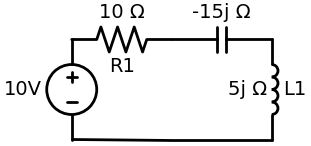

In [12]:
circuito=Circuito()
circuito.element('Resistor',(0,0),(2,0),10,"R1")
circuito.element('Capacitor',(2,0),(4,0),-15j)
circuito.element('Inductor',(4,0),(4,-2),5j,"L1")
circuito.element('Wire',(4,-2),(0,-2))
circuito.element("Voltage Source",(0,-2),(0,0),10)

circuito.draw()
